In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ["Age", "Workclass","Fnlwgt","Education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

In [3]:
df = pd.read_csv('adult.csv',names=columns)
df

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
df.isin([" ?"]).sum(axis=0)

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
#REPLACING " ?" WITH NaN Values

df['Workclass'] = df['Workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
df['native_country'] = df['native_country'].replace(' ?',np.nan)


In [10]:
#Replacing With Mode Values

df.fillna(df['Workclass'].mode()[0],inplace=True)
df.fillna(df['occupation'].mode()[0],inplace=True)
df.fillna(df['native_country'].mode()[0],inplace=True)

In [11]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
df.Workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [13]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Private', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Private',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [15]:
df.capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

In [16]:
df["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

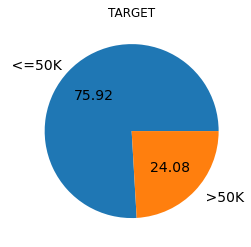

In [17]:
#Target distribution
data = df['income'].value_counts()
barplot = data.plot(kind='pie', title='TARGET', autopct="%.2f", fontsize=14,ylabel='')

In [18]:
#REMOVE UNWANTED COLUMNS

df.drop(['education_num','Fnlwgt','race','relationship'], axis=1, inplace=True)

In [19]:
#LABEL ENCODING

le=LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df['sex'] = le.fit_transform(df['sex'])

#EDUCATION

label_encoding = {'Education':{' Bachelors':9,' HS-grad':8,' 11th':6,' Masters':10,' 9th':4,
       ' Some-college':11, ' Assoc-acdm':12, ' Assoc-voc':13, ' 7th-8th':3,
       ' Doctorate':14, ' Prof-school':15, ' 5th-6th':2,' 10th':5,' 1st-4th':1,
       ' Preschool':0,' 12th':7}}
df.replace(label_encoding,inplace = True)
df.head()

,Age,Workclass,Education,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,9,Never-married,Adm-clerical,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,1,0,0,13,United-States,0
2,38,Private,8,Divorced,Handlers-cleaners,1,0,0,40,United-States,0
3,53,Private,6,Married-civ-spouse,Handlers-cleaners,1,0,0,40,United-States,0
4,28,Private,9,Married-civ-spouse,Prof-specialty,0,0,0,40,Cuba,0


# ONE HOT ENCODING

In [20]:
#WORKCLASS

df = pd.get_dummies(df, columns=['Workclass'], drop_first = True)
df.head()

,Age,Education,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay
0,39,9,Never-married,Adm-clerical,1,2174,0,40,United-States,0,0,0,0,0,0,1,0
1,50,9,Married-civ-spouse,Exec-managerial,1,0,0,13,United-States,0,0,0,0,0,1,0,0
2,38,8,Divorced,Handlers-cleaners,1,0,0,40,United-States,0,0,0,1,0,0,0,0
3,53,6,Married-civ-spouse,Handlers-cleaners,1,0,0,40,United-States,0,0,0,1,0,0,0,0
4,28,9,Married-civ-spouse,Prof-specialty,0,0,0,40,Cuba,0,0,0,1,0,0,0,0


In [21]:
#MARITAL STATUS

df = pd.get_dummies(df, columns=['marital_status'], drop_first = True)
df.head()

,Age,Education,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Workclass_ Local-gov,...,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed
0,39,9,Adm-clerical,1,2174,0,40,United-States,0,0,...,0,0,1,0,0,0,0,1,0,0
1,50,9,Exec-managerial,1,0,0,13,United-States,0,0,...,0,1,0,0,0,1,0,0,0,0
2,38,8,Handlers-cleaners,1,0,0,40,United-States,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,6,Handlers-cleaners,1,0,0,40,United-States,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,9,Prof-specialty,0,0,0,40,Cuba,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
#OCCUPATION

df = pd.get_dummies(df, columns=['occupation'], drop_first = True)
df.head()

,Age,Education,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Workclass_ Local-gov,Workclass_ Never-worked,...,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Private,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,9,1,2174,0,40,United-States,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,9,1,0,0,13,United-States,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,8,1,0,0,40,United-States,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,53,6,1,0,0,40,United-States,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,28,9,0,0,0,40,Cuba,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
#NATIVE COUNTRY

df = pd.get_dummies(df, columns=['native_country'], drop_first = True)
df.head()

,Age,Education,sex,capital_gain,capital_loss,hours_per_week,income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,native_country_ Private,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,9,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,8,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,6,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,9,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df

,Age,Education,sex,capital_gain,capital_loss,hours_per_week,income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,native_country_ Private,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,9,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,8,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,6,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,9,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,8,1,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,8,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,8,1,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df.corr()

,Age,Education,sex,capital_gain,capital_loss,hours_per_week,income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,native_country_ Private,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
Age,1.000000,-0.031481,0.088832,0.077674,5.777454e-02,0.068756,0.234037,0.060901,-0.019362,-0.188702,...,0.001425,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-1.505357e-02,0.000375
Education,-0.031481,1.000000,-0.026747,0.087865,4.680014e-02,0.084405,0.203871,0.038489,-0.012120,-0.110626,...,0.000451,-0.040150,-0.000323,0.006199,0.024803,0.005424,-0.014308,0.136642,-6.250560e-03,-0.001495
sex,0.088832,-0.026747,1.000000,0.048480,4.556735e-02,0.229309,0.215980,-0.037966,0.001405,-0.072078,...,0.014695,-0.015791,-0.003504,-0.004663,0.003088,-0.014012,-0.012744,-0.006993,-1.205333e-03,0.006753
capital_gain,0.077674,0.087865,0.048480,1.000000,-3.161506e-02,0.078409,0.223329,-0.007007,-0.002140,-0.049602,...,0.013326,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-2.564276e-03,-0.002193
capital_loss,0.057775,0.046800,0.045567,-0.031615,1.000000e+00,0.054256,0.150526,0.014668,-0.003177,-0.037895,...,0.010375,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.008784,-5.997599e-07,-0.004804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_country_ Thailand,-0.006271,0.005424,-0.014012,-0.003432,-5.095482e-03,0.009537,-0.004078,-0.006164,-0.000345,-0.007765,...,-0.003176,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.068978,-1.067931e-03,-0.000521
native_country_ Trinadad&Tobago,0.004843,-0.014308,-0.012744,-0.003526,8.102329e-03,-0.006006,-0.007660,-0.001148,-0.000354,0.002021,...,-0.003263,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-1.097212e-03,-0.000536
native_country_ United-States,0.015917,0.136642,-0.006993,0.004599,8.783567e-03,0.002446,0.034470,0.033196,0.005000,-0.042728,...,-0.396016,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-1.331803e-01,-0.065031
native_country_ Vietnam,-0.015054,-0.006251,-0.001205,-0.002564,-5.997599e-07,-0.011379,-0.017649,-0.003611,-0.000666,0.008681,...,-0.006131,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000e+00,-0.001007


# TRAIN TEST SPLIT

In [26]:
x=df.drop(["income"],axis=1)
y=df["income"]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(32561, 74)
(32561,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 74)
(6513, 74)
(26048,)
(6513,)


In [28]:
def genmetrics(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print("Classification report \n",classification_report(ytest,ypred))
    print("Accuracy score",accuracy_score(ytest,ypred))
    print("Missclassification rate ", (1 - accuracy_score(ytest,ypred)))

# DECISION TREE 

In [29]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(x_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, tree.predict(x_train)))
print("Test accuracy : ", accuracy_score(y_test, tree.predict(x_test)))

Train accuracy :  0.9757754914004914
Test accuracy :  0.8248119146322739


In [30]:
#HYPERPARAMTER TUNING

distribution = {'criterion':['gini','entropy'],
                'max_depth':list(range(5,17)),
                'min_samples_split':list(range(10,20)),
                'max_leaf_nodes': [8, 16, 32, 64, 128,256]
               }

In [31]:
# Random search for best hyperparameters
search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1),
                         distribution,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=30)

search.fit(x_train, y_train)

# Best parameters for DT classifier
search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'min_samples_split': 18,
 'max_leaf_nodes': 64,
 'max_depth': 16,
 'criterion': 'gini'}

In [32]:
# Retrain with best model

best_tree = search.best_estimator_

best_tree.fit(x_train, y_train)
print(" Best train accuracy : ", accuracy_score(y_train, best_tree.predict(x_train)))
print(" Best test accuracy : ", accuracy_score(y_test, best_tree.predict(x_test)))

 Best train accuracy :  0.8646729115479116
 Best test accuracy :  0.8582834331337326


In [33]:
pred1 = best_tree.predict(x_test)
pred1

array([0, 1, 1, ..., 0, 0, 1])

In [34]:
genmetrics(y_test,pred1)

[[4566  382]
 [ 541 1024]]
Classification report 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4948
           1       0.73      0.65      0.69      1565

    accuracy                           0.86      6513
   macro avg       0.81      0.79      0.80      6513
weighted avg       0.85      0.86      0.86      6513

Accuracy score 0.8582834331337326
Missclassification rate  0.14171656686626743


# RANDOM FOREST

In [35]:
forest = RandomForestClassifier(random_state=1)

forest.fit(x_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, forest.predict(x_train)))
print("Test accuracy : ", accuracy_score(y_test, forest.predict(x_test)))

Train accuracy :  0.9757371007371007
Test accuracy :  0.8476892369107938


In [36]:
#HYPERPARAMETER TUNING

params_grid = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [50, 100, 150, 200]}

In [37]:
# Random search for best hyperparameters
search = RandomizedSearchCV(RandomForestClassifier(random_state=1),
                         params_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=20)

search.fit(x_train, y_train)

# Best parameters for Random forest classifier
search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [38]:
# Retrain with best model

best_forest = search.best_estimator_

best_forest.fit(x_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_forest.predict(x_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_forest.predict(x_test)))

Best train accuracy :  0.8870162776412777
Best test accuracy :  0.8688776293566712


In [39]:
pred2 = best_forest.predict(x_test)
pred2

array([0, 1, 1, ..., 0, 0, 1])

In [40]:
genmetrics(y_test,pred2)

[[4691  257]
 [ 597  968]]
Classification report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4948
           1       0.79      0.62      0.69      1565

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.81      6513
weighted avg       0.86      0.87      0.86      6513

Accuracy score 0.8688776293566712
Missclassification rate  0.13112237064332877


# LOGISTIC REGRESSION

In [41]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, logreg.predict(x_train)))
print("Test accuracy : ", accuracy_score(y_test, logreg.predict(x_test)))

Train accuracy :  0.8124232186732187
Test accuracy :  0.8157531091662829


In [42]:
# Hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'fit_intercept':[True, False],
              'max_iter':[100, 200, 300],
              'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 5}],
              'solver':['newton-cg', 'lbfgs', 'liblinear']
             }

In [43]:
# Random search for best hyperparameters
search = RandomizedSearchCV(LogisticRegression(random_state=1),
                         param_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=30)

search.fit(x_train, y_train)

# Best parameters for Logistic regression classifier
search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 300,
 'fit_intercept': False,
 'class_weight': {0: 1, 1: 1},
 'C': 100}

In [44]:
# Retrain with best model

best_logreg = search.best_estimator_

best_logreg.fit(x_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_logreg.predict(x_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_logreg.predict(x_test)))

Best train accuracy :  0.8364173832923832
Best test accuracy :  0.837095040687855


In [45]:
pred3 = best_logreg.predict(x_test)
pred3

array([0, 1, 1, ..., 0, 0, 1])

In [46]:
genmetrics(y_test,pred3)

[[4558  390]
 [ 671  894]]
Classification report 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      4948
           1       0.70      0.57      0.63      1565

    accuracy                           0.84      6513
   macro avg       0.78      0.75      0.76      6513
weighted avg       0.83      0.84      0.83      6513

Accuracy score 0.837095040687855
Missclassification rate  0.162904959312145


# KNN Classifier

In [47]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(x_train,y_train)

print('Training Score:',accuracy_score(y_train,kNN.predict(x_train)))
print('Testing Score:',accuracy_score(y_test,kNN.predict(x_test)))

Training Score: 0.9045224201474201
Testing Score: 0.8377091969906341


In [ ]:
#HYPERPARAMTER TUNING

hparams_knn={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25]}

search = GridSearchCV(kNN,hparams_knn,scoring='accuracy')
search.fit(x_train, y_train)

# Best parameters for kNN classifier
search.best_params_

In [ ]:
# Retrain with best model

best_kNN = search.best_estimator_

best_kNN.fit(x_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_kNN.predict(x_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_kNN.predict(x_test)))

In [ ]:
pred4 = best_kNN.predict(x_test)
pred4

In [ ]:
genmetrics(y_test,pred4)

#  SVC

In [ ]:
svc = SVC(kernel='linear', random_state = 1)
svc.fit(x_train,y_train)

print('Training Score:',accuracy_score(y_train,svc.predict(x_train)))
print('Testing Score:',accuracy_score(y_test,svc.predict(x_test)))